In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path('results')
files = {
    'WIS': base_dir / 'exp-FINAL-1' / 'vaso_eps_0_1-flip200_seed0-orig.csv',
    'DR ': base_dir / 'exp-DR-1' / 'vaso_eps_0_1-flip0_seed0-dr.csv',
    'CAIS Perfect': base_dir / 'exp-FINAL-2' / 'vaso_eps_0_1-flip200_seed0-aug_step-annotEval.csv',
    'CAIS Biased (Noise=0.2)': base_dir / 'exp-FINAL-3' / 'vaso_eps_0_1-flip200_seed0-aug_step-annotEval-Noise_0.2.csv',
    'CANDOR Perfect': base_dir / 'exp-CANDOR-1' / 'vaso_eps_0_1-flip0_seed0-candor-perfect.csv',
    'CANDOR Biased (Noise=0.2)': base_dir / 'exp-CANDOR-22' / 'vaso_eps_0_1-flip0_seed0-candor-biased-Noise_0.2.csv'
}

data = {}
true_value = 0.4088

for label, file in files.items():
    if file.exists():
        df = pd.read_csv(file)
        if 'DR_value' in df.columns:
            vals = df['DR_value'].values
        elif 'CANDOR_value' in df.columns:
            vals = df['CANDOR_value'].values
        else:
            vals = df['WIS_value'].values
        data[label] = vals
        print(f"{label}: mean={np.mean(vals):.4f}, std={np.std(vals):.4f}, bias={np.mean(vals)-true_value:.4f}")
    else:
        print(f"Missing {file}")

WIS: mean=0.3935, std=0.0755, bias=-0.0153
DR : mean=0.3816, std=0.0268, bias=-0.0272
CAIS Perfect: mean=0.2679, std=0.0136, bias=-0.1409
CAIS Biased (Noise=0.2): mean=0.2666, std=0.0151, bias=-0.1422
CANDOR Perfect: mean=0.7633, std=0.0290, bias=0.3545
CANDOR Biased (Noise=0.2): mean=0.7624, std=0.0290, bias=0.3536


C:\Users\Biao\AppData\Local\Temp\ipykernel_24252\2721415830.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data.values(), labels=data.keys(), patch_artist=True, medianprops=dict(color='red'), showfliers=False)
C:\Users\Biao\AppData\Local\Temp\ipykernel_24252\2721415830.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


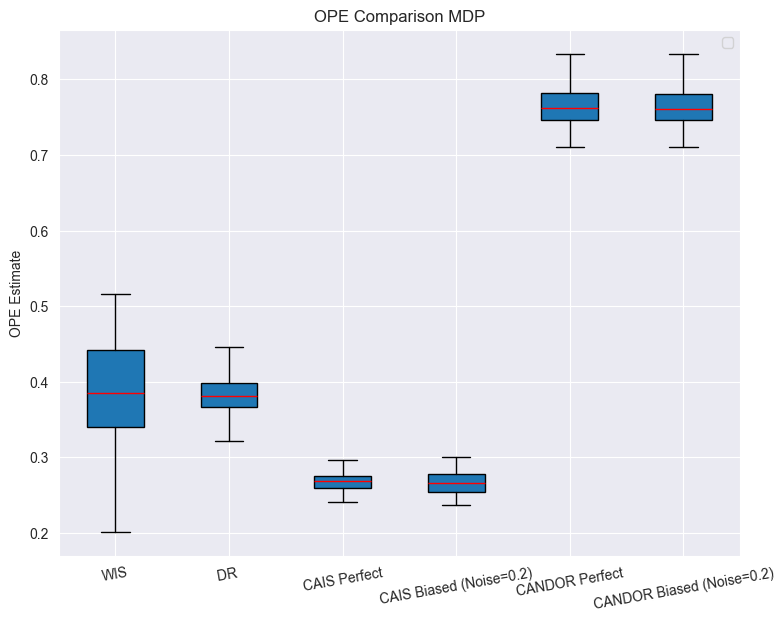

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(data.values(), labels=data.keys(), patch_artist=True, medianprops=dict(color='red'), showfliers=False)
ax.set_ylabel('OPE Estimate')
ax.set_title('OPE Comparison MDP')
ax.legend()
plt.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=10)
plt.savefig('ope_boxplot_MDP.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
summary = pd.DataFrame({
    'Method': list(data.keys()),
    'Mean': [np.mean(v) for v in data.values()],
    'variance': [np.std(v) for v in data.values()],
    'Bias': [np.mean(v) - true_value for v in data.values()]
})
print(summary)

                      Method      Mean  variance      Bias
0                        WIS  0.393533  0.075499 -0.015267
1                        DR   0.381596  0.026809 -0.027204
2               CAIS Perfect  0.267936  0.013641 -0.140864
3    CAIS Biased (Noise=0.2)  0.266593  0.015063 -0.142207
4             CANDOR Perfect  0.763258  0.029009  0.354458
5  CANDOR Biased (Noise=0.2)  0.762379  0.028959  0.353579
